In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


In [44]:
def get_data(dir= 'data', split= 'train', track= 'a', language= 'ptbr'):
    
    archive = language + '.csv' if split == 'train' else language + '_' + track + '.csv'

    path = f'{dir}/{split}/track_{track}/{archive}'
    
    return pd.read_csv(path)


def get_fold(dir= 'data', split= 'train', track= 'a', language= 'ptbr', fold= 0):
    
    archive = language + '.csv' if split == 'train' else language + '_' + track + '.csv'

    path = f'validacao/data/folds_{track}/fold_{fold}.csv'
    
    return pd.read_csv(path)



def save_folds(dataframe, track='a'):
    for fold in range(5):
        fold_data = dataframe[dataframe['kfold'] == fold]
        fold_data.to_csv(f'validacao/data/folds_{track}/fold_{fold}.csv', index=False)

In [42]:
dataframe = get_data(split="train")
dataframe

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_train_track_a_00001,"minha vó me disse que era frango e eu comi, ti...",0,0,0,0,1,0
1,ptbr_train_track_a_00002,Está e a nossa deputada Benedita linda guerrei...,0,0,0,1,0,0
2,ptbr_train_track_a_00003,só falta as roupas kkkkkkkkkkk,0,0,0,1,0,0
3,ptbr_train_track_a_00004,Eu tmb. Comecei a sair de casa agora (fui pela...,0,0,0,0,1,0
4,ptbr_train_track_a_00005,Peço a Deus que nossos dirigentes tenham realm...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2221,ptbr_train_track_a_02222,Eu acho que o CAP vai surpreender hein.,0,0,0,0,0,1
2222,ptbr_train_track_a_02223,23:59 - Lula sabia de toda a corrupção no seu ...,1,0,0,0,0,0
2223,ptbr_train_track_a_02224,O Brasil precisa URGENTE de pessoas sérias e c...,1,0,0,0,0,0
2224,ptbr_train_track_a_02225,Sera que só eu acho que ta passando da hora de...,1,0,0,0,0,0


In [48]:

# Adicionar a coluna 'kfold' e inicializar com -1
dataframe['kfold'] = -1

# Embaralhar o dataframe
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

# Definir o número de folds
kf = KFold(n_splits=5)

# Preencher a coluna 'kfold' com o número do fold
for fold, (train_idx, val_idx) in enumerate(kf.split(dataframe)):
    dataframe.loc[val_idx, 'kfold'] = fold

# Visualizar o resultado
dataframe.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise,kfold
0,ptbr_train_track_a_00737,Me perdoe mas isso é ridículo O mundo é feit...,1,0,0,0,0,0,0
1,ptbr_train_track_a_00943,pelo no peito e na barriga é feio demais pqp,0,1,0,0,0,0,0
2,ptbr_train_track_a_01948,o q o seu amigo exige caralho,1,0,0,0,0,0,0
3,ptbr_train_track_a_00745,ai desanimei mas quando chegar a hora vou acab...,0,0,0,0,1,0,0
4,ptbr_train_track_a_01018,Eh... realmente faz todo sentido ![gif](emote|...,0,0,0,1,0,0,0


In [49]:

def distrib(dataframe):

    count_ones = (dataframe.drop(columns=['id', 'text', 'kfold']) == 1).sum()

    plt.figure(figsize=(10, 6))
    count_ones.plot(kind='bar', color='orange')
    plt.title('Contagem de Valores "1" por Sentimento (Track A)', fontsize=16)
    plt.ylabel('Contagem de "1"', fontsize=12)
    plt.xlabel('Sentimentos', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Fold: 0


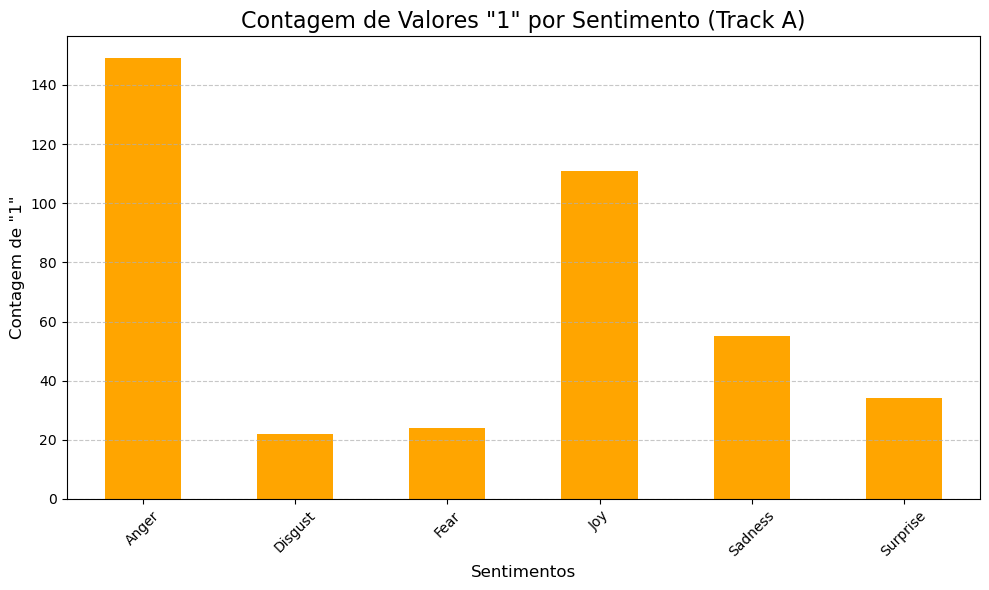

Fold: 1


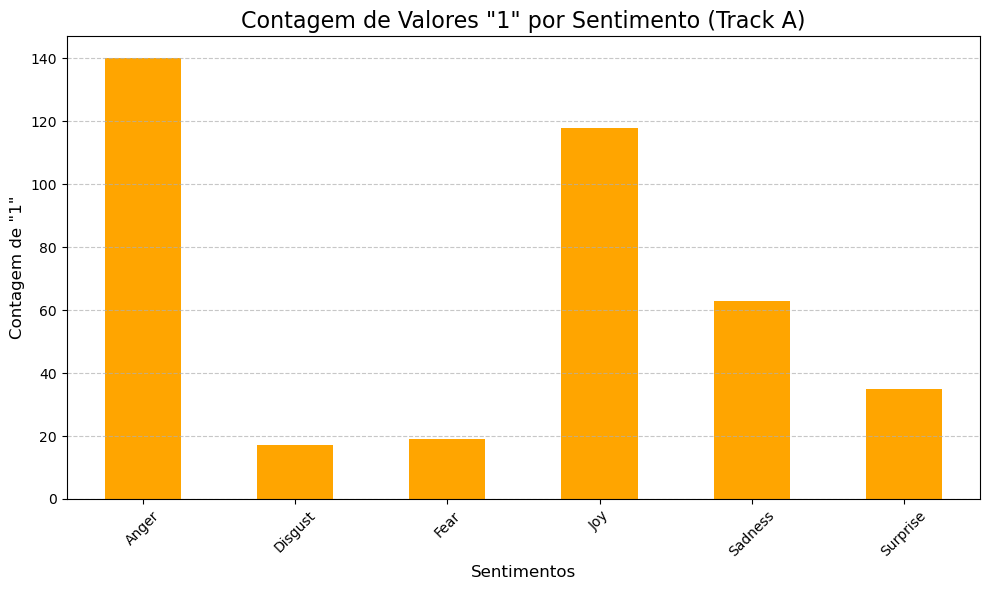

Fold: 2


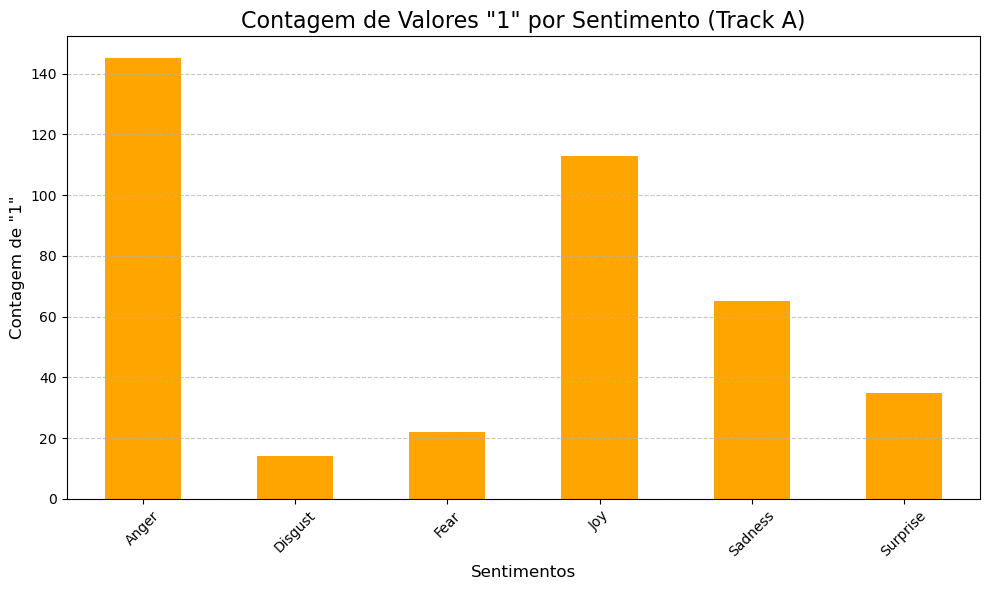

Fold: 3


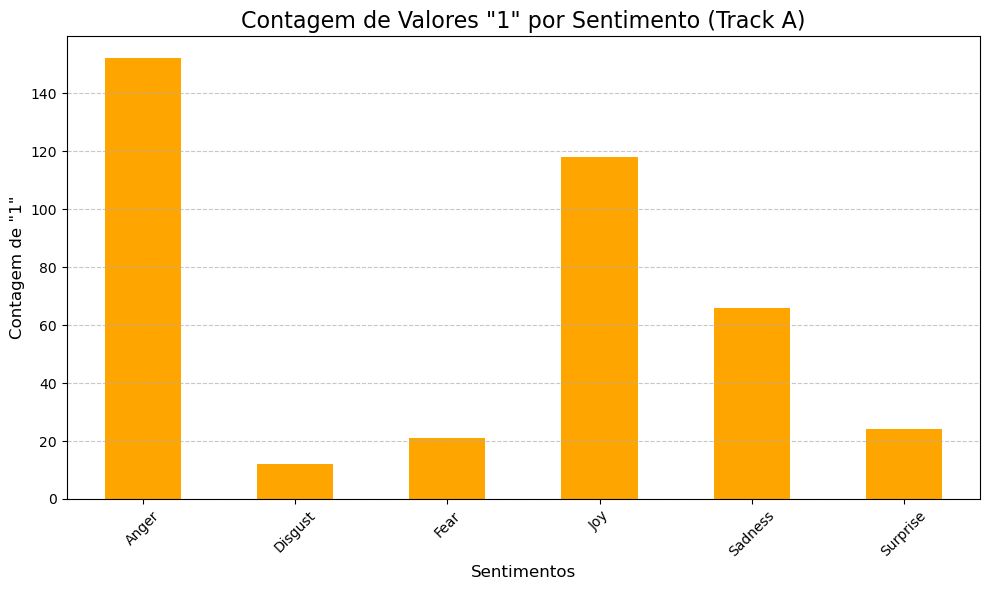

Fold: 4


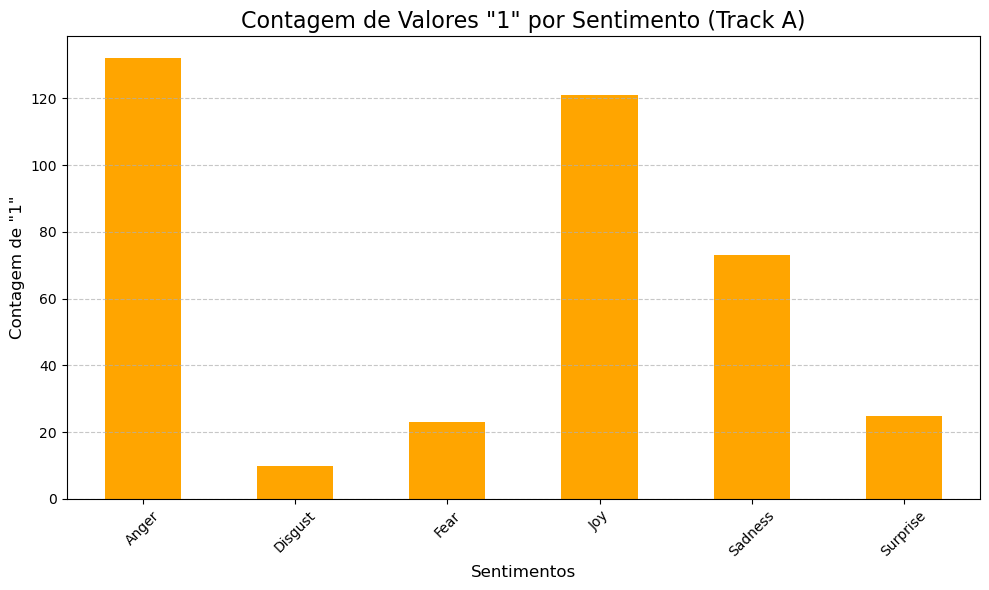

In [50]:
def folds_distrib(dataframe):
    for fold in range(5):
        print(f'Fold: {fold}')
        df_fold = dataframe[dataframe.kfold == fold]
        distrib(df_fold)

folds_distrib(dataframe)